# Assignment #1

Please follow instruction below to complete your assingment. 
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: [Please replace this with your ID]

In [1]:
%matplotlib inline 
import os, sys
import json
import networkx as nx

# Import any other package you may need
import random
import matplotlib.pyplot as plt

## Erdos-Renyi network simulation

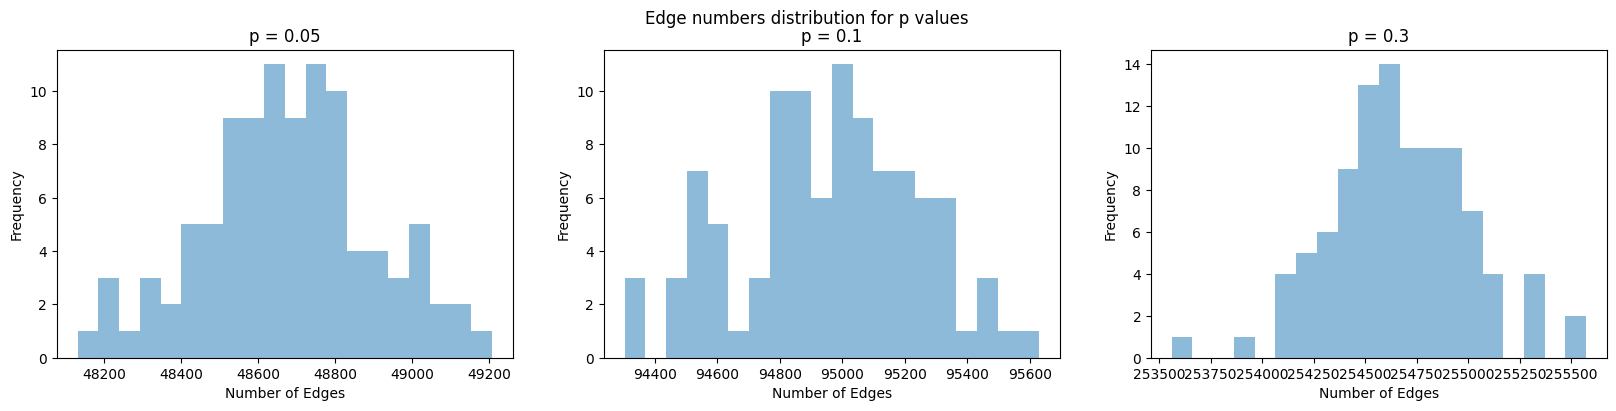

In [2]:
def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    
    graph.add_nodes_from(range(N))

    for x in graph.nodes:
        for y in graph.nodes:
            if x is not y and random.random() < p:
                graph.add_edge(x, y)
    
    return graph

probs = [0.05, 0.1, 0.3]

# It takes around 1 minute to run when N = 1000
N = 1000
times = 100

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for i in range(len(probs)):
    edgeNums = list()
    for k in range(times):
        tempNet = simulate_erdos_renyi(N, probs[i])
        edgeNums.append(len(tempNet.edges))
    
    axs[i].hist(edgeNums, bins=20, alpha=0.5)
    axs[i].set_title("p = "+ str(probs[i]))
    axs[i].set_xlabel('Number of Edges')
    axs[i].set_ylabel('Frequency')

fig.suptitle("Edge numbers distribution for p values")
plt.show()

# Network generation and node properties

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

1) You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

2) Plot degree distribution. Depending on the graph topology either use linear or logarithmic scale.

3) For each edge, plot heatmap for degree of the nodes at each end and discuss whether the network is assortative or disassortative.

### Functions:

In [3]:
def loadNetwork(fileName):
    return nx.read_edgelist(fileName, data=(('weight', int),))

def printProperties(G):
    graphDensity = nx.density(G)
    lccsize = len(max(nx.connected_components(G), key=len))

    if nx.is_connected(G):
        radius = nx.radius(G)
    else:
        radius = "dissconnected graph"

    print("Graph density:", graphDensity)
    print("Largest connected component size:", lccsize)
    print("Radius:", radius)

def subPlotDegDist(G, netName, axs, i):
    degrees = [G.degree(n) for n in G.nodes()]

    axs[i].hist(degrees, bins=range(max(degrees)+2), alpha=0.5)

    axs[i].set_title(netName + ' Degree Distribution')
    axs[i].set_xlabel('Degree')
    axs[i].set_ylabel('Frequency')

    if nx.is_connected(G):
        axs[i].set_xscale('linear')
    else:
        axs[i].set_xscale('log')

def assortativity(G):
    asscoeff = nx.degree_assortativity_coefficient(G)

    print("Assortativity Coefficient:", asscoeff)

    if  asscoeff > 0:
        print("The network is assortative.")
    else:
        print("The network is disassortative.")


### Network analysis

In [5]:
airNet = loadNetwork('US_airport_networks_(2010).txt')
emailNet = loadNetwork('Email_network_(Uni.R-V,Spain,2003).txt')
corpNet = loadNetwork('Corporate_ownership_(2002).txt')

nx.write_gexf(airNet, 'US_airport_networks_(2010).gexf')
nx.write_gexf(emailNet, 'Email_network_(Uni.R-V,Spain,2003).gexf')
nx.write_gexf(corpNet, 'Corporate_ownership_(2002).gexf')


print("Airport Network Properties:")
printProperties(airNet)

print("\nEmail Network Properties:")
printProperties(emailNet)

print("\nCorporate Ownership Network Properties:")
printProperties(corpNet)


Airport Network Properties:
Graph density: 0.023887775551102206
Largest connected component size: 500
Radius: 4

Email Network Properties:
Graph density: 0.0085017730219967
Largest connected component size: 1133
Radius: 5

Corporate Ownership Network Properties:
Graph density: 0.0002552531850753276
Largest connected component size: 4475
Radius: dissconnected graph


### Plot degree distribution

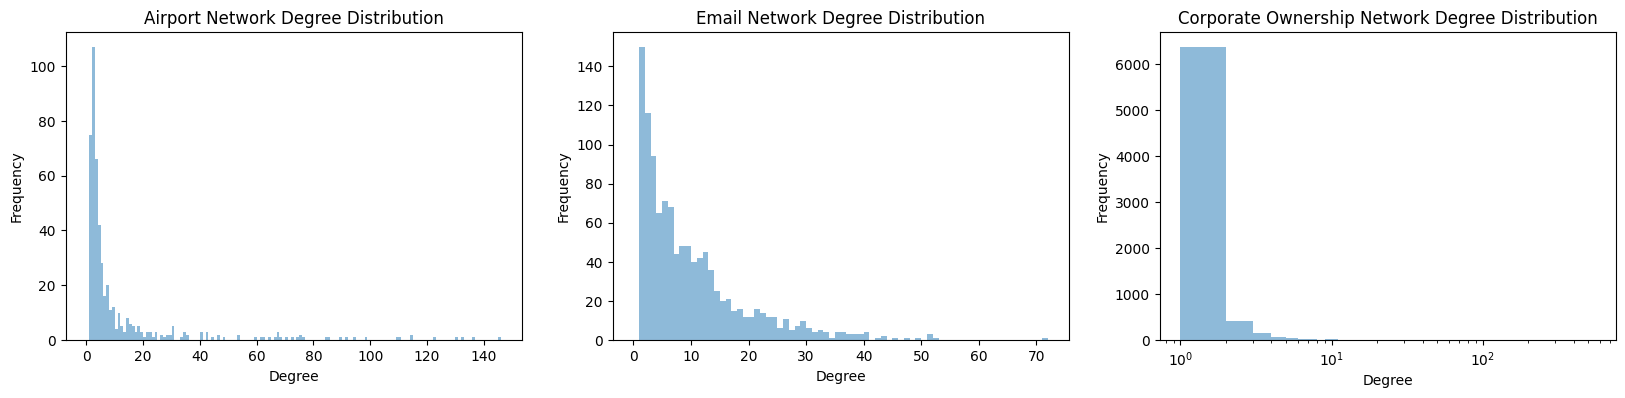

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

subPlotDegDist(airNet, "Airport Network", axs, 0)
subPlotDegDist(emailNet, "Email Network", axs, 1)
subPlotDegDist(corpNet, "Corporate Ownership Network", axs, 2)

plt.show()

### Assortativeness analysis

In [7]:
print("Airport Network Properties:")
assortativity(airNet)

print("\nEmail Network Properties:")
assortativity(emailNet)

print("\nCorporate Ownership Network Properties:")
assortativity(corpNet)

Airport Network Properties:
Assortativity Coefficient: -0.26786294344854145
The network is disassortative.

Email Network Properties:
Assortativity Coefficient: 0.07829876925480413
The network is assortative.

Corporate Ownership Network Properties:
Assortativity Coefficient: -0.18093234710714576
The network is disassortative.


# Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice

In [8]:
def drawNodeLabels(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels={node: str(node) for node in G.nodes()}, font_size=12)
    plt.show()

def findDepth(G):
    if len(G.nodes()) == 0:
        return -1
    else:
        return nx.shortest_path_length(G, list(G.nodes())[-1], 1)

In [10]:
# expand: increase cayley tree's depth by one
def expandTree(G, k):
    if len(G.nodes()) == 0:
        G.add_node(1)
    else:
        if len(G.nodes()) == 1:
            leafNodesList = [1]
        else:
            leafNodesList = [n for n in G.nodes() if G.degree(n) == 1]

        for leafNode in leafNodesList:
            while G.degree(leafNode) != k:
                G.add_node(len(G.nodes())+1)
                G.add_edge(leafNode, len(G.nodes()))
    
    print("Expanded:")
    drawNodeLabels(G)
    print("Current depth:", findDepth(G))
    print("Size:", len(G.nodes()))
    print()

Expanded:


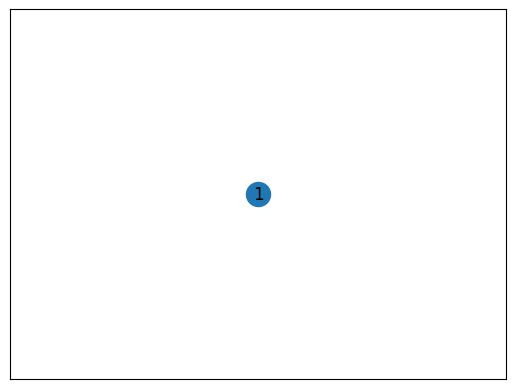

Current depth: 0
Size: 1

Expanded:


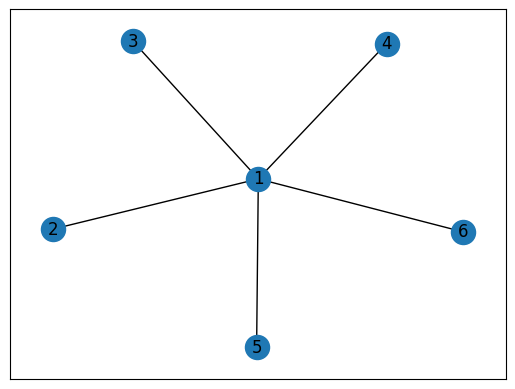

Current depth: 1
Size: 6

Expanded:


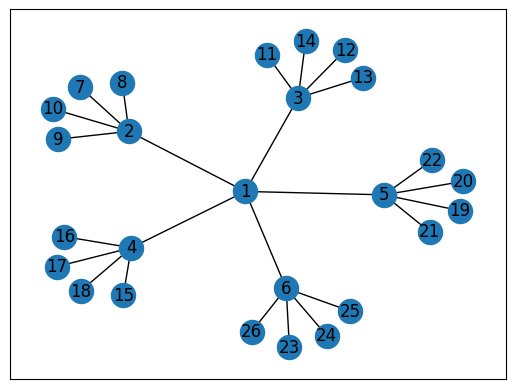

Current depth: 2
Size: 26

Expanded:


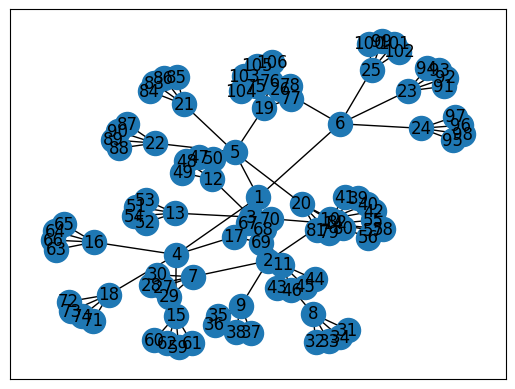

Current depth: 3
Size: 106

Expanded:


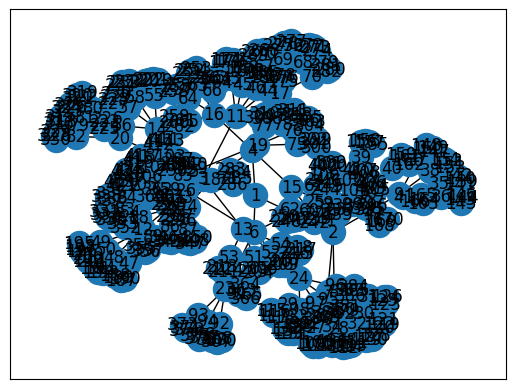

Current depth: 4
Size: 426



In [11]:
# formula to find number of nodes by knowing degree and depth
def numberofnodes(degree, depth):
    if depth == 0:
        return 1
    elif depth == 1:
        return 1 + degree
    else:
        return numberofnodes(degree, depth-1) + (numberofnodes(degree, depth-1) - numberofnodes(degree, depth-2)) * (degree - 1)

# create a cayley tree with given degree and longest path
def createCayleyTree(degree, longestPath):
    G = nx.Graph()

    targetDepth = longestPath / 2

    targetNodeCount = numberofnodes(degree, targetDepth)

    while(len(G.nodes()) != targetNodeCount):
        expandTree(G, degree)
    
    return G

cayTree = createCayleyTree(5, 8)

# Since it is hard to see the tree properly on figure after depth 2, I've exported the network to visualize it on Gephi. The visualization is at the report.
nx.write_gexf(cayTree, 'cayTree.gexf')